# Introduction:
The n-grams are a sequence of n-words used to estimate the probability of the next word given the previous n-1 words using conditional probabilities like P(w|h) (the probability of a word w to be the next word given the sentence history h).

$$ P(w│h)=(Count(h+w))/(Count(h)) $$
Eq.1. Conditional probability.

Where the symbol "+" stands for concatenation and "Count" stands for the number of times the sentence appears in the corpora.
These models are used in tasks such as speech recognition, grammatical error correction or grammatical error correction. The probability stored in the model tell the user if the word is probably correct or not (by correct It means if the word is presented in the corpora in a sequence like the one of interest).

To implement these models, first It’s necessary to tokenize the given corpora, for example: convert “If you want this, you can do it, yes you can!” Into the list [“If”, “you”, “want”, “this”, “,”, “you”, “can”, “do”, “it”, “,”, “yes”, “you”, “can”, “!”]. Then the next task is making groups based on the order of the n-gram, for example, for a bigram (or 2-gram) the groups will be formed by joining 2 consecutive tokens [“if you”, “you want”, “want this”, “this,”, “, you”, “you can”, “can do”, “do it”, “it,”, “, yes”, “yes you”, “you can”, “can!”]. For a trigram (3-gram) we get [“if you want”, “you want this”, “want this,”, “this, you”, “, you can”, “you can do”, “can do it”, “do it,”, “it, yes”, “, yes you”, “yes you can”, “you can!”] and something similar for the 4-gram.

Once the list of groups is formed, these are counted and summarized in a new variable. then the groups will be group by the first n-1 elements of each group (where n is the degree of the n-gram) thus generating a kind of index. this representation basically tell us that given the seen data (the index) what are the possible words that could be next (the elements inside the index). Here the eq.1 is used to convert the frequencies into probabilities (see the flowchart example below).


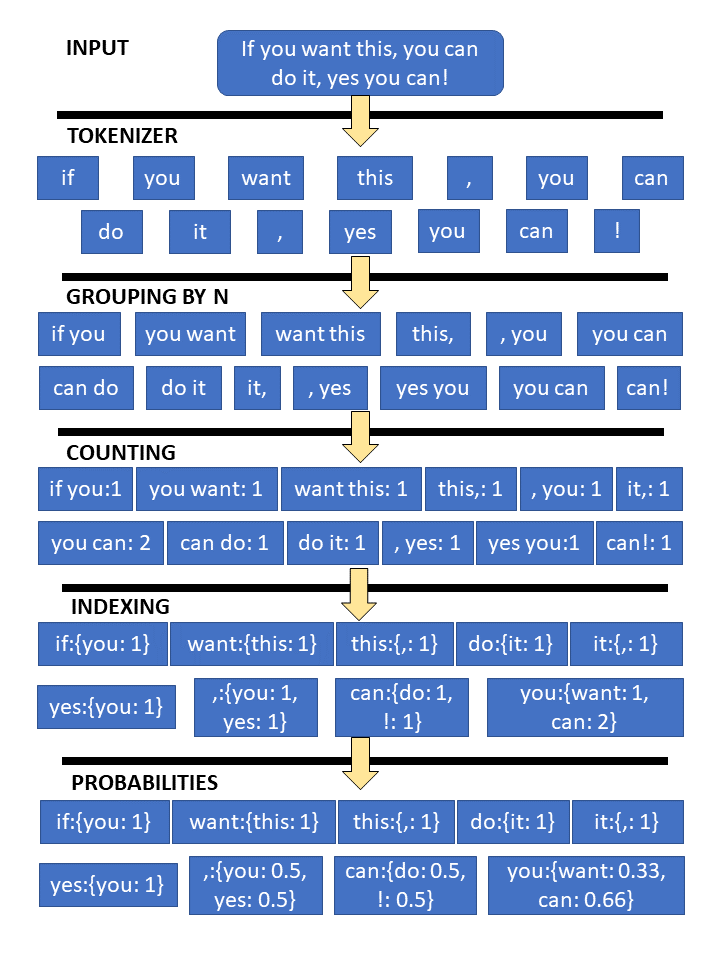



Finally, these data are used to predict the next word of a sentence. The flowchart is presented below:

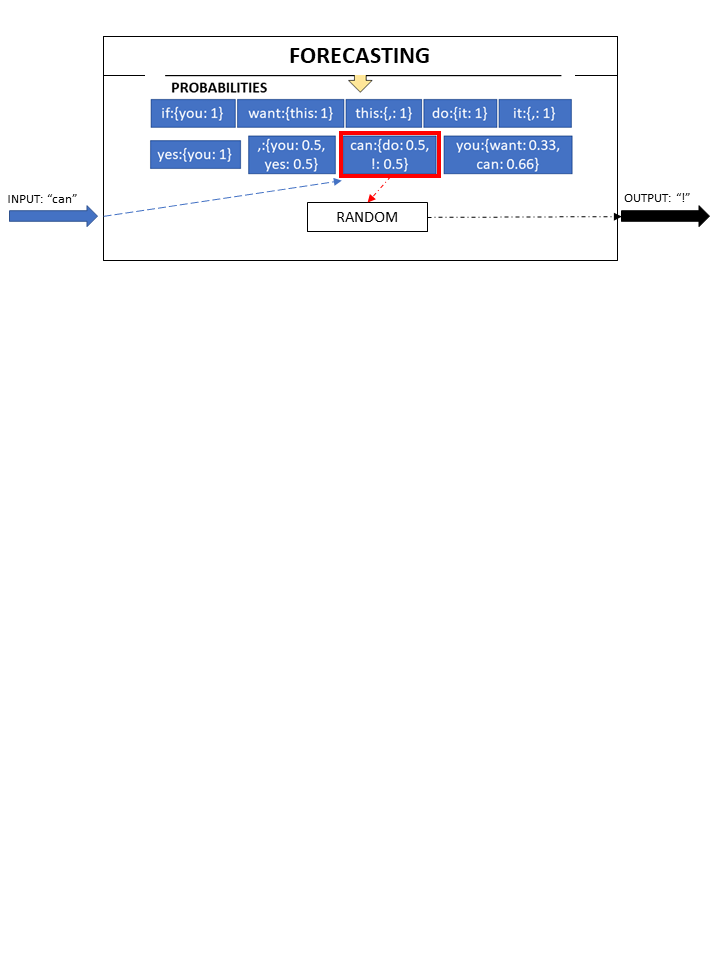

# Implementation
The Corpora required for the development of the model is contained in the text file “corpus.txt”, as a plane text. The packages needed are nltk (natural language toolkit) and random (for random choices).
Following the flowchart, the tokenization part is done with the word_tokenize() function from the nltk package. 
 
The “grouping by n” part is done within the function “groupTokensByN(tokens, n = 2)” and “counting” part is also done within the  “groupTokensByN()” with the help of the function “FreqDist(tokenGroups)” from the nltk package. 
 
The “indexing” part is done with the function “nestedGroupsByN”.
 
The “probabilities” part is done with the function " getProbability”.
 
In order to make predictions with the models the function “getRandomSentence” is proposed, the predictions are under two options, the first one chooses the word with the higher probability (when maxFlag is active) and the second one chooses a word based on a probability distribution using the “random.choices” function.


In [1]:
#import neede libraries
from nltk.tokenize import word_tokenize
import nltk
import random
random.seed(24)
nltk.download('punkt')

#get the frequency by pair
#group by the first n-1 items, to make a kind of index
# if always chooses the one with highest probability, then drop the rest
# if not, keep them and choose based on probability

#use it:
#give the first n-1 words of the sentence
#produce the remaining 10-n+1



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WoodDigitize\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#load the dataset
f = open('corpus.txt', 'r', encoding="utf8")
#tokenize the dataset
tokens = word_tokenize(f.read())
f.close()
tokens[:15]

['Towards',
 'a',
 'Framework',
 'for',
 'Understanding',
 'the',
 'Performance',
 'of',
 'Blockchains',
 'M.',
 'Touloupou',
 ',',
 'K.',
 'Christodoulou',
 ',']

In [3]:
def groupTokensByN(tokens, n = 2):
    '''Makes groups of tokens of length equal to n and return their frequency
    Inputs:
        tokens: ordered list of individual tokens
        n: (optional, default is 2) degree of the n-gram model
    Outputs:
        freq: dictionary{key:members of the group; value: frequency}'''
    #grouping (repeat items allowed)
    tokenGroups = [tuple(tokens[i-n:i]) for i in range(n,len(tokens))]
    #counting (summarize)
    freq = nltk.FreqDist(tokenGroups)
    return freq

In [4]:
#get the frequency by pair
freq = groupTokensByN(tokens, n = 2)
freq

FreqDist({(',', 'and'): 103, ('of', 'the'): 95, ('.', 'The'): 60, (',', 'the'): 51, ('in', 'the'): 50, ('to', 'the'): 38, ('the', 'blockchain'): 38, ('smart', 'contracts'): 37, ('such', 'as'): 35, ('of', 'blockchain'): 33, ...})

In [5]:
def nestedGroupsByN(freq, n = 2):
    '''
    regroup freq dictionary by the first n-1 items of each key
    Inputs:
        freq: dictionary{key:members of the group; value: frequency}
        n: (optional, default is 2) degree of the n-gram model
    Outputs:
        freqGroup: nested dictionary {key:first n-1 members,{key:last member, value:frequency}}
    '''
    #initialize variable
    freqGroup = {}
    #for each tuple
    for k,v in freq.items():
        if k[:n-1] in freqGroup: #if index group (first n-1 members) already exists, add a child
            freqGroup[k[:n-1]][k[-1]] = v
        else: #if index group doesn't exist, create index group and add a child
            freqGroup[k[:n-1]] = {k[-1]:v}
    return freqGroup

In [6]:
#group by the first n-1 items, to make a kind of index
freqGroup = nestedGroupsByN(freq, n = 2)
freqGroup

{('Towards',): {'a': 2, 'that': 1},
 ('a',): {'Framework': 2,
  'worldwide': 1,
  'technology': 1,
  'software': 2,
  'comprehensive': 1,
  'lack': 2,
  'blockchain': 16,
  'shared': 2,
  'set': 2,
  'peer-to-peer': 1,
  'consensus': 3,
  'type': 1,
  'Distributed': 1,
  'cryptocurrency': 1,
  'lot': 4,
  'central': 1,
  'proposed': 1,
  ')': 2,
  'staged': 1,
  'benchmarking': 1,
  'framework': 2,
  'private': 1,
  'local': 1,
  'challenging': 2,
  'full-mesh': 1,
  'given': 1,
  'monitoring': 1,
  'connectivity': 1,
  'future': 1,
  'common': 2,
  'systematic': 1,
  'blockchain-enabled': 1,
  'decentralized': 5,
  'more': 1,
  'scientist': 2,
  'researcher': 2,
  'centralized': 2,
  'database': 1,
  'single': 1,
  'peer': 3,
  'diverse': 1,
  'variety': 1,
  'monopoly': 1,
  'larger': 1,
  'long': 2,
  'scientific': 1,
  'proof-ofauthority': 1,
  'research': 1,
  'proof': 1,
  'wide': 1,
  'primary': 1,
  'usability': 1,
  'user': 3,
  'Web3': 2,
  'passwordless': 1,
  'service': 1,


In [7]:
def getProbability(freqGroup):
    '''
    convert nested frequencies into probabilites
    Inputs:
        freqGroup: nested dictionary {key:first n-1 members,{key:last member, value:frequency}}
    output: 
        freqProb: nested dictionary {key:first n-1 members,{key:last member, value:Probability}}
        '''
    #initialize variable
    freqProb = {}
    #for each group
    for k in freqGroup:
        totalGroup = sum(freqGroup[k].values()) #get total frequency per group
        freqProb[k] = {k_ : v/totalGroup 
                       for k_,v in freqGroup[k].items()}#divide every member of the nested group by the total freq
    return freqProb

In [8]:
freqProb = getProbability(freqGroup)
freqProb

{('Towards',): {'a': 0.6666666666666666, 'that': 0.3333333333333333},
 ('a',): {'Framework': 0.01,
  'worldwide': 0.005,
  'technology': 0.005,
  'software': 0.01,
  'comprehensive': 0.005,
  'lack': 0.01,
  'blockchain': 0.08,
  'shared': 0.01,
  'set': 0.01,
  'peer-to-peer': 0.005,
  'consensus': 0.015,
  'type': 0.005,
  'Distributed': 0.005,
  'cryptocurrency': 0.005,
  'lot': 0.02,
  'central': 0.005,
  'proposed': 0.005,
  ')': 0.01,
  'staged': 0.005,
  'benchmarking': 0.005,
  'framework': 0.01,
  'private': 0.005,
  'local': 0.005,
  'challenging': 0.01,
  'full-mesh': 0.005,
  'given': 0.005,
  'monitoring': 0.005,
  'connectivity': 0.005,
  'future': 0.005,
  'common': 0.01,
  'systematic': 0.005,
  'blockchain-enabled': 0.005,
  'decentralized': 0.025,
  'more': 0.005,
  'scientist': 0.01,
  'researcher': 0.01,
  'centralized': 0.01,
  'database': 0.005,
  'single': 0.005,
  'peer': 0.015,
  'diverse': 0.005,
  'variety': 0.005,
  'monopoly': 0.005,
  'larger': 0.005,
  'l

In [9]:
def getRandomSentence(freqProb, numWords, sentence, maxFlag = True, seed = 0):
    '''
    get a random sentence using the statistics generated by the corpora
    input: 
        freqProb: nested dictionary {key:first n-1 members,{key:last member, value:Probability}}
        numWords: the length of the final sentence
        sentence: list of tokens to start
        maxFlag: if True, the next token will be the member with higher probability, if False
                next token will be randomly chosen based on the probabilities of each member.
        seed: seed of the random module
    output:
        output: final sentence as a string 
    '''
    random.seed(seed)#set random state
    n = len(list(freqProb.keys())[0]) + 1 #infer the degree of the model 
    sentence = sentence[:] #make a copy of the given sentence list
    numWords -= len(sentence) #number of words to be generated
    if maxFlag: #the next token will be the member with higher probability
        for i in range(0,numWords):
            bag = freqProb[tuple(sentence[-(n-1):])] #dict of next possible tokens
            sentence.append(max(bag,key = bag.get)) #get the token with max prob
            
    else:#next token will be randomly chosen based on the probabilities of each member.
        for i in range(0,numWords):
            bag = freqProb[tuple(sentence[-(n-1):])] #dict of next possible tokens
            sentence.append(random.choices(list(bag.keys()),weights = list(bag.values()), k = 1)[0]) #randomly get a token with based on prob
    #convert the sentence into a string format
    output = '' 
    for s in sentence:
        output += s + ' '
    #remove some unnecesary spaces
    return output.replace(" ,",",").replace(" :",":").replace(" .",".").replace(" '","'").replace("( ","(").replace(" )",")").replace("[ ","[").replace(" ]","]")

In [10]:
sentence = list(random.choice(list(freqProb.keys())))
output = getRandomSentence(freqProb, numWords = 10, sentence = sentence, maxFlag = False)
output

'relations of insurance industry, a monopoly on the same '

In [11]:
def n_gram(tokens, n):
    #build n-grams from corpora
    freq = groupTokensByN(tokens, n = n)
    freqGroup = nestedGroupsByN(freq, n = n)
    return getProbability(freqGroup)

## First Test

In [12]:
bigram = n_gram(tokens, n = 2)
trigram = n_gram(tokens, n = 3)
n_gram_4 = n_gram(tokens, n = 4)
numWords = 10
for i in range(5):
    random.seed(i)
    #generate first portion of the sentences
    sentenceBigram = list(random.choice(list(bigram.keys())))
    sentenceTrigram = list(random.choice(list(trigram.keys())))
    sentence4gram = list(random.choice(list(n_gram_4.keys())))
    
    #get sentences just picking up the max frequency
    outputBigramMax = getRandomSentence(bigram, numWords = numWords, sentence = sentenceBigram, maxFlag = True)
    outputTrigramMax = getRandomSentence(trigram, numWords = numWords, sentence = sentenceTrigram, maxFlag = True)
    output4gramMax = getRandomSentence(n_gram_4, numWords = numWords, sentence = sentence4gram, maxFlag = True)
    
    #get sentences randomly selecting based on probability
    outputBigramProb = getRandomSentence(bigram, numWords = numWords, sentence = sentenceBigram, maxFlag = False, seed = i)
    outputTrigramProb = getRandomSentence(trigram, numWords = numWords, sentence = sentenceTrigram, maxFlag = False, seed = i)
    output4gramProb = getRandomSentence(n_gram_4, numWords = numWords, sentence = sentence4gram, maxFlag = False, seed = i)
    print(f"ROUND {i}")
    print(f"Max output for bigram: \n {outputBigramMax}")
    print(f"Random output for bigram: \n {outputBigramProb}\n")
    
    print(f"Max output for trigram: \n {outputTrigramMax}")
    print(f"Random output for trigram: \n {outputTrigramProb}\n")
    
    print(f"Max output for 4-gram: \n {output4gramMax}")
    print(f"Random output for 4-gram: \n {output4gramProb}\n")
    

ROUND 0
Max output for bigram: 
 strategic plan to the blockchain technology, and the blockchain 
Random output for bigram: 
 strategic source code, and has complete chain, it 

Max output for trigram: 
 ICO is not sound The healthy operation of the blockchain 
Random output for trigram: 
 ICO is selling tokens linked to the user's academic 

Max output for 4-gram: 
 record of the underlying data. But ordinary nodes can 
Random output for 4-gram: 
 record of the underlying data. But ordinary nodes can 

ROUND 1
Max output for bigram: 
 instantiation of the blockchain technology, and the blockchain technology 
Random output for bigram: 
 instantiation of academic degree certification requirements, personally identifiable information 

Max output for trigram: 
 will issue an academic certificate after review according to the 
Random output for trigram: 
 will issue an academic certificate after review according to many 

Max output for 4-gram: 
 to the source code, test and debug the sys

## Second Test
Using the same input sentence for all 3 models

In [13]:
#using the same input sentence
for i in range(5):
    random.seed(i)
    #generate first portion of the sentences
    sentenceBigram = sentenceTrigram = sentence4gram = list(random.choice(list(n_gram_4.keys())))
    
    #get sentences just picking up the max frequency
    outputBigramMax = getRandomSentence(bigram, numWords = numWords, sentence = sentenceBigram, maxFlag = True)
    outputTrigramMax = getRandomSentence(trigram, numWords = numWords, sentence = sentenceTrigram, maxFlag = True)
    output4gramMax = getRandomSentence(n_gram_4, numWords = numWords, sentence = sentence4gram, maxFlag = True)
    
    #get sentences randomly selecting based on probability
    outputBigramProb = getRandomSentence(bigram, numWords = numWords, sentence = sentenceBigram, maxFlag = False, seed = i)
    outputTrigramProb = getRandomSentence(trigram, numWords = numWords, sentence = sentenceTrigram, maxFlag = False, seed = i)
    output4gramProb = getRandomSentence(n_gram_4, numWords = numWords, sentence = sentence4gram, maxFlag = False, seed = i)
    print(f"ROUND {i}")
    print(f"Max output for bigram: \n {outputBigramMax}")
    print(f"Random output for bigram: \n {outputBigramProb}\n")
    
    print(f"Max output for trigram: \n {outputTrigramMax}")
    print(f"Random output for trigram: \n {outputTrigramProb}\n")
    
    print(f"Max output for 4-gram: \n {output4gramMax}")
    print(f"Random output for 4-gram: \n {output4gramProb}\n")
    

ROUND 0
Max output for bigram: 
 credibility measurement model which is a blockchain technology, and 
Random output for bigram: 
 credibility measurement model of insurance industry, a monopoly on 

Max output for trigram: 
 credibility measurement model related to blockchain. The system data 
Random output for trigram: 
 credibility measurement model related to time factors, which reduces 

Max output for 4-gram: 
 credibility measurement model related to time factors, which might 
Random output for 4-gram: 
 credibility measurement model related to time factors, which might 

ROUND 1
Max output for bigram: 
 failure or authority to the blockchain technology, and the 
Random output for bigram: 
 failure or authority to 2014, and regulations are divided 

Max output for trigram: 
 failure or authority to synchronize the state channel ”, 
Random output for trigram: 
 failure or authority to restrict information access exists [32 

Max output for 4-gram: 
 failure or authority to restric

In [82]:
summary

{'2_gram': {'numOfGroups': 2330,
  'numOfsubGroups': 7571,
  'AVGOfsubGroups': 3.249356223175966},
 '3_gram': {'numOfGroups': 7571,
  'numOfsubGroups': 10245,
  'AVGOfsubGroups': 1.3531898031964074},
 '4_gram': {'numOfGroups': 10245,
  'numOfsubGroups': 11080,
  'AVGOfsubGroups': 1.0815031722791606}}

## Analysis
- When using the same source sentence the bigram model differs quickly from the other two models. Meanwhile the Trigram and the 4-gram tends to have similar results. 

- The 4-gram tends to mimic more the corpora since four of the five sentences generated in the first test were found textually in the corpora. this may be explained with help of the summary section that shows that the 4-gram is te model with the most indexes but with the least members per index, so few or only one option is available to choose and here the random choose can not help too much.

- if the degree of the model is higher, then the probability of finding the same sequence of words is too low, making the vocabulary or the index part of the model very big, in the first test the 4-gram was 4.75 times bigger than the index size of the bigram model.

- The n-gram is very sensible to the corpora and must be trained based on the working field of interest.

- If the input sentence has a combination not seen in the training data (or unknown words), the degree of the n-gram should be reduced and try to find a match.

Below is a table where the sentences generated in the first test were corroborated against the corpora

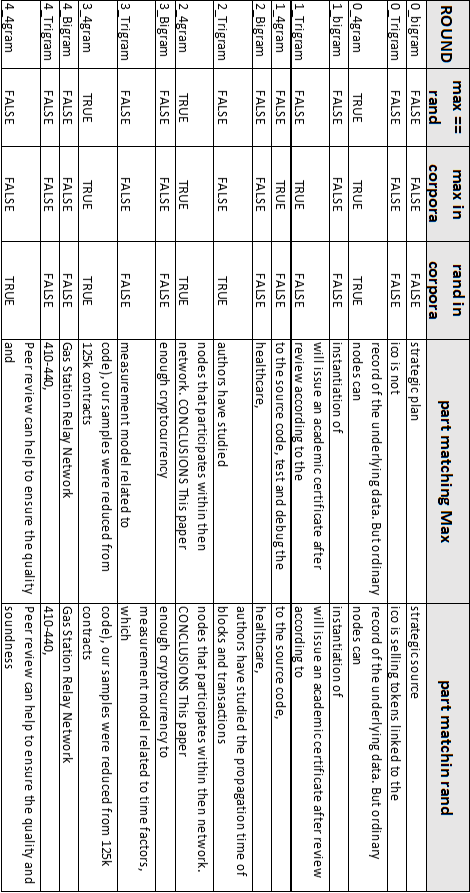